#### Pakages


In [732]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data 

In [733]:
kings_county_data = pd.read_csv(r"C:\Users\noree\OneDrive\Desktop\Data Science Projects\Individual Project\kc_house_data.csv\kc_house_data.csv")

In [734]:
#display all columns
pd.options.display.max_columns = None
kings_county_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [735]:
#shape
kings_county_data.shape

(21613, 21)

### DATA CLEANING

In [736]:
#data types
kings_county_data.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [737]:
#See unique values to see if data type is correct
kings_county_data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [738]:
#statistical information for numeric variables
#%config Completer.use_jedi = False
kings_county_data.describe(include = [np.number], percentiles = [0.5]).transpose().drop("count", axis = 1)  
    

,mean,std,min,50%,max
id,4.580302e+09,2.876566e+09,1.000102e+06,3.904930e+09,9.900000e+09
price,5.400881e+05,3.671272e+05,7.500000e+04,4.500000e+05,7.700000e+06
bedrooms,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.300000e+01
bathrooms,2.114757e+00,7.701632e-01,0.000000e+00,2.250000e+00,8.000000e+00
sqft_living,2.079900e+03,9.184409e+02,2.900000e+02,1.910000e+03,1.354000e+04
sqft_lot,1.510697e+04,4.142051e+04,5.200000e+02,7.618000e+03,1.651359e+06
floors,1.494309e+00,5.399889e-01,1.000000e+00,1.500000e+00,3.500000e+00
waterfront,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,1.000000e+00
view,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,4.000000e+00
condition,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,5.000000e+00


In [739]:
#statistical information for non-numeric variables
kings_county_data.describe(include = [object], percentiles = [0.5]).transpose().drop("count", axis = 1)  


,unique,top,freq
date,372,20140623T000000,142


In [740]:
#missing values
"There are " + str(kings_county_data.isna().sum().sum()) + " missing values in the data"

'There are 0 missing values in the data'

In [741]:
# percentage of missing values per column
(kings_county_data.isna().sum() / len(kings_county_data)) * 100

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [742]:
#check for duplicated variables
kings_county_data.duplicated(subset = ["id", "date"]).sum() == 0

True

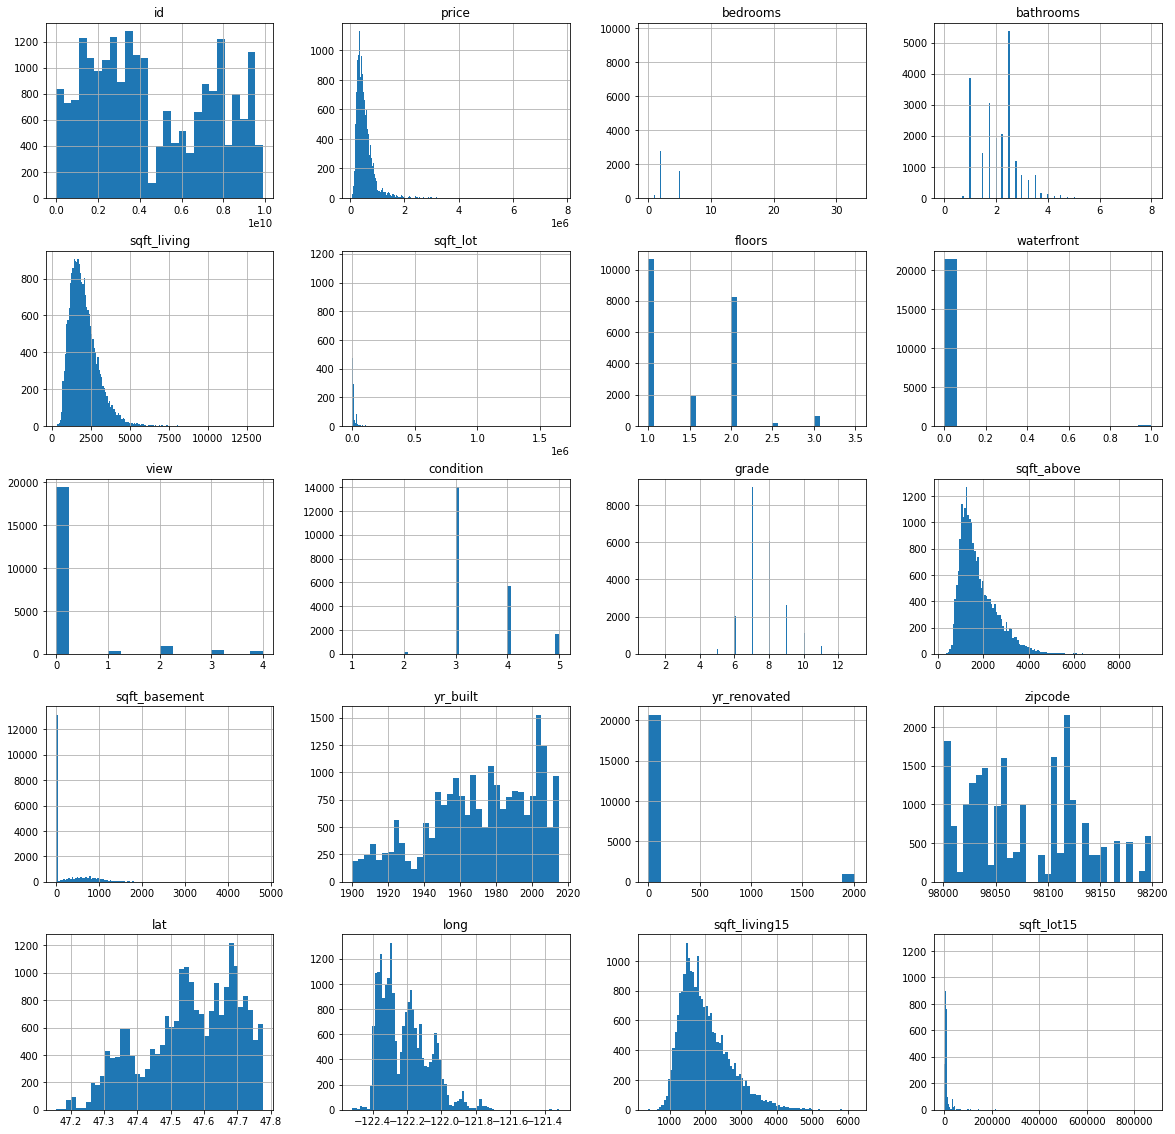

In [743]:
# histogram of each numerical feature
kings_county_data.hist(bins = "auto", figsize = (20,20));

In [744]:
#kings_county_data['sqft_above'].max()

In [745]:
#select non string columns only
numerical_data = kings_county_data.select_dtypes(exclude = object).columns

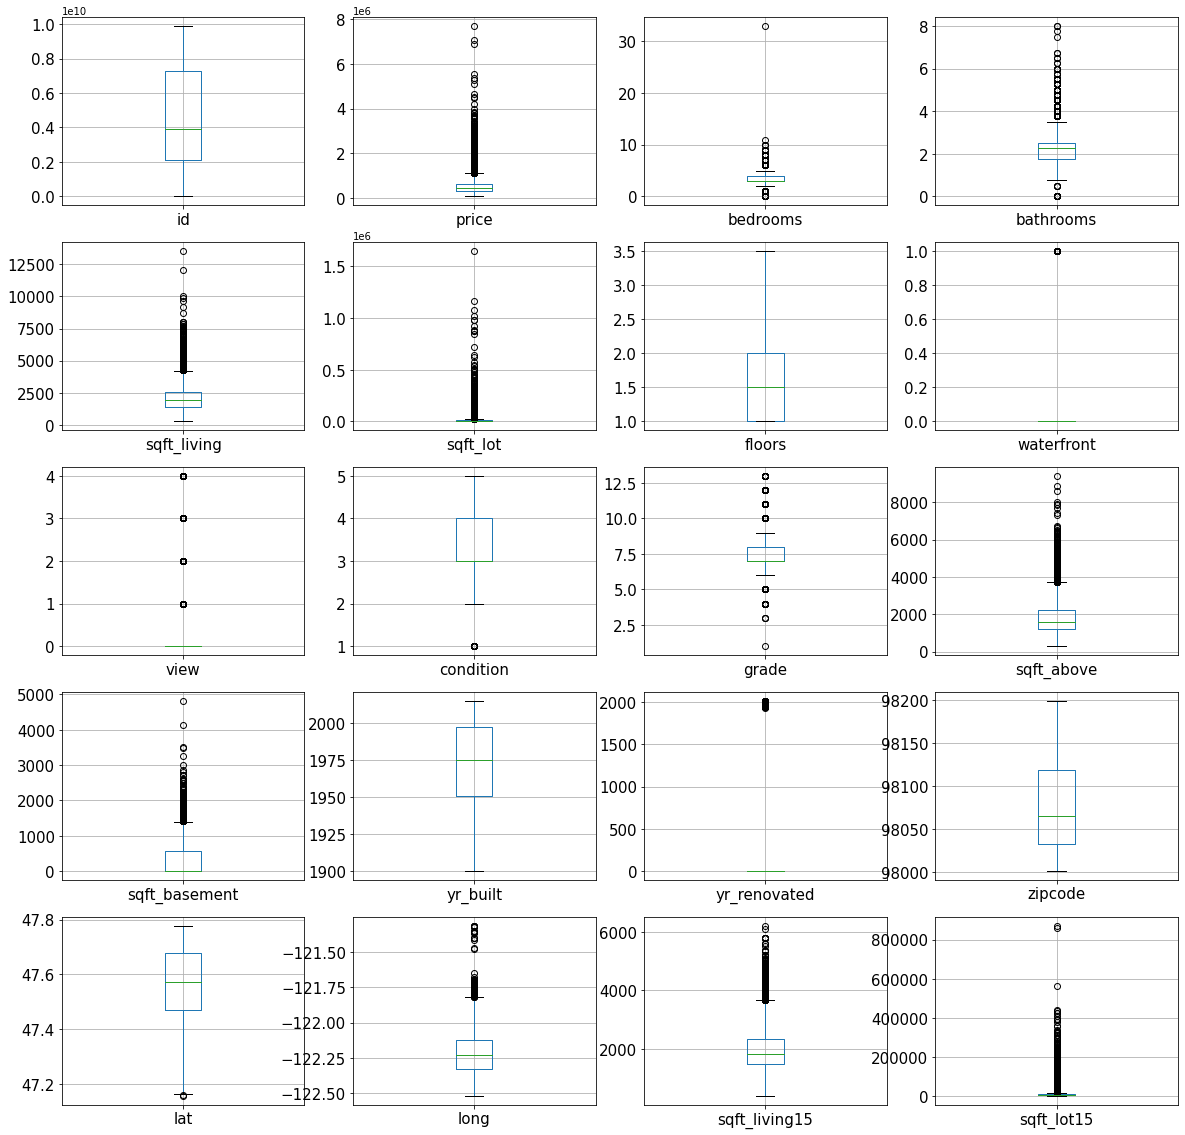

In [746]:
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20,20))
# counter
index = 0
for row in range(len(axes)):
    for col in range(len(axes[row])):
        if index == len(numerical_data):
            break
        ax = axes[row][col]
        var = kings_county_data[[numerical_data[index]]]
        var.boxplot(fontsize = 15, ax = ax)
        index += 1

In [747]:
#check for irrelevant values in numeric columns - non numeric values.

incorrect_sqfts = []
for val in kings_county_data.sqft_basement:
    try:
        float(val)
    except:
        incorrect_sqfts.append(val)
        
print("There is/are", len(incorrect_sqfts), "erroneous value(s) in the sqft_basement column.")

There is/are 0 erroneous value(s) in the sqft_basement column.


### DATA PREPARATION

In [748]:
#convert date
kings_county_data.date = pd.to_datetime(kings_county_data.date)

In [749]:
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(kings_county_data.corr(), dtype=bool))

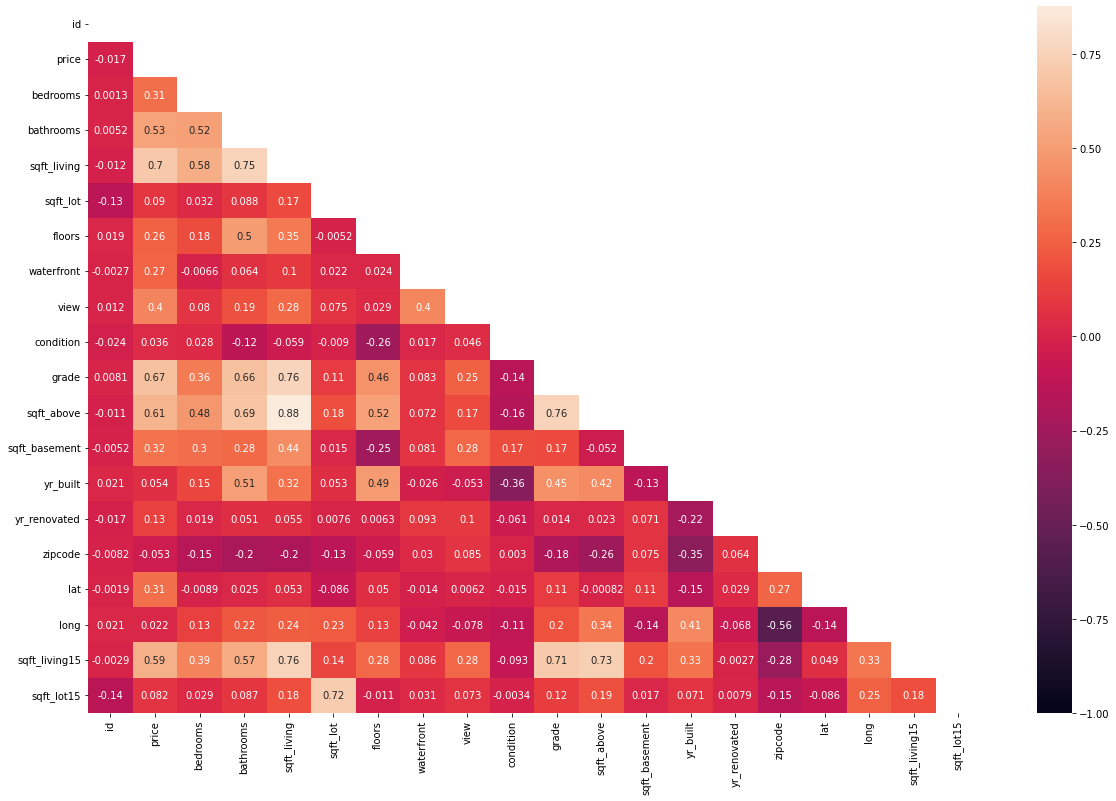

In [750]:
#generate the heatmap
fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(kings_county_data.corr(), annot = True, mask = mask, vmin =-1, ax=ax); #annot = True,cmap='rocket'


In [751]:
#VIF
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [752]:
# compute the vif for all given features
def compute_vif(considered_features):
    
    X = kings_county_data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [753]:
# features to consider removing
considered_features = ['sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_lot15', 'sqft_living15']




In [754]:
# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

C:\Users\noree\AppData\Local\Temp\ipykernel_34064\2145631105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,sqft_living,5.177023
3,sqft_above,4.812970
2,grade,2.828265
5,sqft_living15,2.680391
4,sqft_lot15,2.100967
1,sqft_lot,2.080651


In [755]:
# compute vif values after removing a feature
considered_features.remove('sqft_living')
compute_vif(considered_features)

C:\Users\noree\AppData\Local\Temp\ipykernel_34064\2145631105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,sqft_lot,2.079515
1,grade,2.690580
2,sqft_above,2.880500
3,sqft_lot15,2.100966
4,sqft_living15,2.491762


In [756]:
# compute vif values after removing a feature
considered_features.remove('sqft_above')
compute_vif(considered_features)

C:\Users\noree\AppData\Local\Temp\ipykernel_34064\2145631105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,sqft_lot,2.071278
1,grade,2.038784
2,sqft_lot15,2.098480
3,sqft_living15,2.076925


### Data Exploration

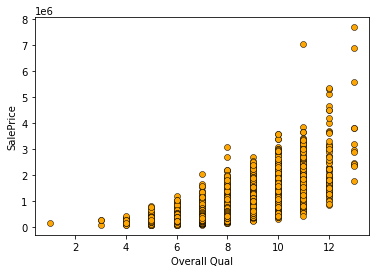

In [757]:
plt.scatter(x=kings_county_data['grade'], y=kings_county_data['price'],
color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");


#### GET DATA READY FOR ML

In [758]:
#make the target a new dataframe and also drop irrelevant var and transformed var
inputs = kings_county_data.drop(['price', 'id', 'date'], axis='columns')
target = kings_county_data['price']

In [759]:
#inputs


In [760]:
from sklearn.model_selection import train_test_split

In [761]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=123)


In [762]:
from sklearn import metrics as m

### DECISION TREE

In [763]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [764]:
#create a Decision Tree Regressor
decision = tree.DecisionTreeRegressor()

In [765]:
#decision = tree.DecisionTreeRegressor(criterion='mse', #gini to select degree of best split
                                  #splitter='best',
                                  #max_depth=None,
                                  #min_samples_split=2,
                                  #min_samples_leaf=1,
                                  #min_weight_fraction_leaf=0.0,
                                  #max_features=None,
                                  #random_state=None,
                                  #max_leaf_nodes=None,
                                  #min_impurity_decrease=0.0,
                                  #min_impurity_split=None,
                                 #)

In [766]:
parameter_space = {
    "splitter":["best","random"],
    "max_depth": [1,8],
    "min_samples_split": [2,10],
   #'max_features': ['auto', 'sqrt', 'log2']
}

In [767]:
decision = GridSearchCV(DecisionTreeRegressor(), param_grid = parameter_space, cv=4, scoring="neg_mean_absolute_error")

In [768]:
#train the modela
decision.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 8], 'min_samples_split': [2, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [769]:
decision.score(X_test, y_test)

-96878.45933017887

In [770]:
#clf = clf.fit(X_train, y_train)
y_pred = decision.predict(X_train)
#m.accuracy_score(y_pred, y_test)

In [771]:
print('R^2: ', m.r2_score(y_train, y_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_train, y_pred))
print('MSE: ', m.mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_train, y_pred)))

R^2:  0.8553862008215025
Adjusted R^2:  0.85521392759945
MAE:  85056.84452650216
MSE:  19426662201.82522
RMSE:  139379.56163593434


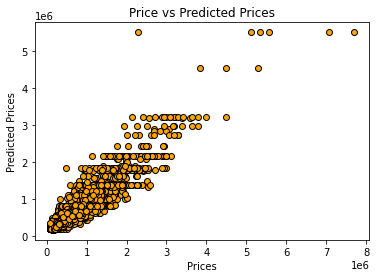

In [772]:
#Difference between actual price and predicted prices
plt.scatter(y_train, y_pred, color="orange", edgecolors="#000000")
plt.title('Price vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.show()

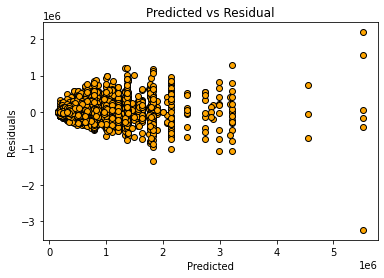

In [773]:
#check the residuals
plt.scatter(y_pred, y_train-y_pred, color="orange", edgecolors="#000000")
plt.title('Predicted vs Residual')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

C:\Users\noree\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


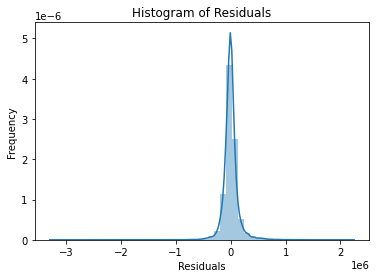

In [774]:
#check for normality in errors
sns.distplot(y_train-y_pred)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

###### Model Evaluation

In [775]:
#Use test data with the model
y_test_pred = decision.predict(X_test)

In [776]:
#Model Evaluation
r2_decision = m.r2_score(y_test,y_test_pred)
mae_decision =m.mean_absolute_error(y_test,y_test_pred)
print('R^2: ', m.r2_score(y_test,y_test_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_test,y_test_pred))
print('MSE: ', m.mean_squared_error(y_test,y_test_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_test,y_test_pred)))

R^2:  0.7766128495917911
Adjusted R^2:  0.775990890008288
MAE:  96878.45933017887
MSE:  30335888709.668694
RMSE:  174172.00897293657


In [777]:
for i in zip(decision.best_estimator_.feature_importances_,X_train):
    print(i)

(0.0, 'bedrooms')
(0.0010682127164786028, 'bathrooms')
(0.2723093302430026, 'sqft_living')
(0.0033751599930801814, 'sqft_lot')
(0.00048117869834756854, 'floors')
(0.03869661654491593, 'waterfront')
(0.0016087267512820038, 'view')
(0.0016784806719264515, 'condition')
(0.3989413974489128, 'grade')
(0.009847989775614989, 'sqft_above')
(0.0, 'sqft_basement')
(0.009454383606731962, 'yr_built')
(8.237137988266095e-05, 'yr_renovated')
(0.011587584655292898, 'zipcode')
(0.1678753472139907, 'lat')
(0.06044909302251165, 'long')
(0.01783564732667179, 'sqft_living15')
(0.004708479951357152, 'sqft_lot15')


In [778]:
importances = decision.best_estimator_.feature_importances_

In [779]:
importances

array([0.00000000e+00, 1.06821272e-03, 2.72309330e-01, 3.37515999e-03,
       4.81178698e-04, 3.86966165e-02, 1.60872675e-03, 1.67848067e-03,
       3.98941397e-01, 9.84798978e-03, 0.00000000e+00, 9.45438361e-03,
       8.23713799e-05, 1.15875847e-02, 1.67875347e-01, 6.04490930e-02,
       1.78356473e-02, 4.70847995e-03])

<AxesSubplot:>

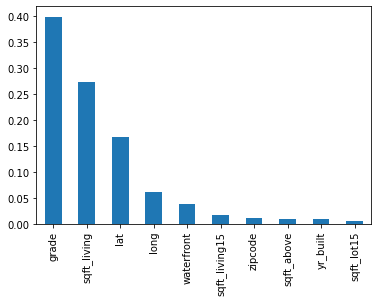

In [780]:
(pd.Series(decision.best_estimator_.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='bar'))

### RANDOM FOREST

In [781]:
from sklearn.ensemble import RandomForestRegressor

In [782]:
#create a random forest
random = RandomForestRegressor()

###### Model Training

In [783]:
random.fit(X_train, y_train)

RandomForestRegressor()

###### Model Testing

In [784]:
#predict y
y_pred = random.predict(X_train)

###### Model Evaluation

In [785]:
print('R^2: ', m.r2_score(y_train, y_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_train, y_pred))
print('MSE: ', m.mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_train, y_pred)))

R^2:  0.9811461658134736
Adjusted R^2:  0.9811237059183473
MAE:  26114.94647844411
MSE:  2532725576.8917856
RMSE:  50326.19175828612


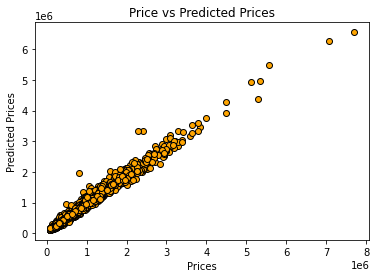

In [786]:
#Difference between actual price and predicted prices
plt.scatter(y_train, y_pred,color="orange", edgecolors="#000000")
plt.title('Price vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.show()

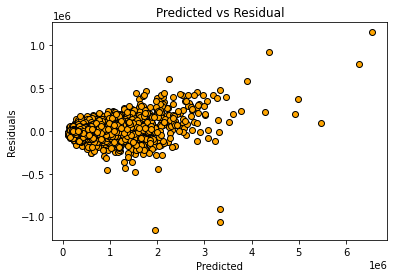

In [787]:
#check the residuals
plt.scatter(y_pred, y_train-y_pred,color="orange", edgecolors="#000000")
plt.title('Predicted vs Residual')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

C:\Users\noree\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


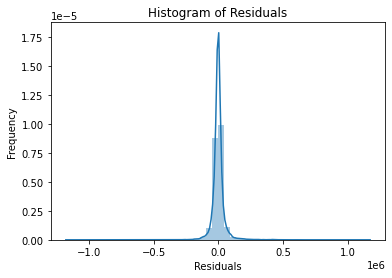

In [788]:
#check for normality in errors
sns.distplot(y_train-y_pred)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

###### Model Evaluation

In [789]:
#Use test data with the model
y_test_pred = random.predict(X_test)

In [790]:
#Model Evaluation
r2_random = m.r2_score(y_test,y_test_pred)
mae_random =m.mean_absolute_error(y_test,y_test_pred)
print('R^2: ', m.r2_score(y_test,y_test_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_test,y_test_pred))
print('MSE: ', m.mean_squared_error(y_test,y_test_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_test,y_test_pred)))

R^2:  0.8787153381658427
Adjusted R^2:  0.8783776546526153
MAE:  69891.34926459637
MSE:  16470410213.243818
RMSE:  128337.09601375519


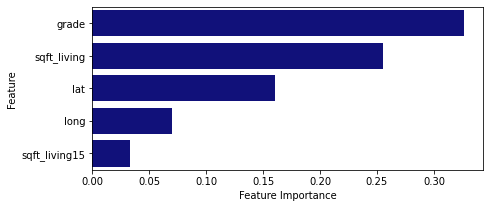

In [791]:
random_feature_importances = random.feature_importances_
random_feature_importances = pd.Series(random_feature_importances, index=X_train.columns.values).sort_values(ascending=False).head(5)
fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(x=random_feature_importances,
y=random_feature_importances.index,
color="darkblue")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [792]:
#feature importance
for i in zip( random.feature_importances_,X_train ):
    print(sorted([i], key = lambda x:x[1]))

[(0.002886654310428147, 'bedrooms')]
[(0.008174330812549051, 'bathrooms')]
[(0.2551410527153204, 'sqft_living')]
[(0.014408373947039687, 'sqft_lot')]
[(0.00230520037347916, 'floors')]
[(0.026148683252389712, 'waterfront')]
[(0.011651888477182355, 'view')]
[(0.0032149197510298625, 'condition')]
[(0.32658532939916124, 'grade')]
[(0.022740407420888252, 'sqft_above')]
[(0.005772782339567406, 'sqft_basement')]
[(0.026010497619351692, 'yr_built')]
[(0.0027641239858893535, 'yr_renovated')]
[(0.01347228157888169, 'zipcode')]
[(0.16078484690463743, 'lat')]
[(0.07034284419536253, 'long')]
[(0.03324812450017324, 'sqft_living15')]
[(0.014347658416668895, 'sqft_lot15')]


### XG BOOST

In [793]:
from xgboost import XGBRegressor, plot_importance
from sklearn.feature_selection import SelectFromModel

In [794]:
xgboost = XGBRegressor(colsample_bytree = 0.5,
 learning_rate = 0.01,
 max_depth = 7,
 min_child_weight = 5,
 n_estimators = 500,
 objective = 'reg:squarederror',
 subsample= 0.5)

###### Model Training

In [795]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=7, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

###### Model Testing

In [796]:
#predict y
y_pred = xgboost.predict(X_train)

###### Model Evaluation

In [797]:
print('R^2: ', m.r2_score(y_train, y_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_train, y_pred))
print('MSE: ', m.mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_train, y_pred)))

R^2:  0.9328042155956301
Adjusted R^2:  0.9327241676724481
MAE:  59094.64300969992
MSE:  9026730591.588432
RMSE:  95009.1079401782


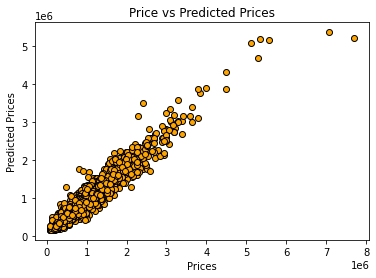

In [798]:
#Difference between actual price and predicted prices
plt.scatter(y_train, y_pred,color="orange", edgecolors="#000000")
plt.title('Price vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.show()

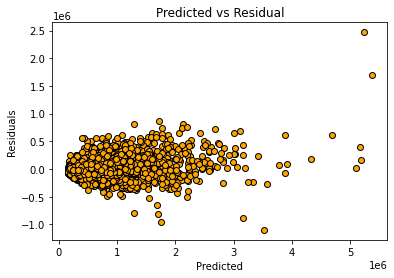

In [799]:
#check the residuals
plt.scatter(y_pred, y_train-y_pred,color="orange", edgecolors="#000000")
plt.title('Predicted vs Residual')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

C:\Users\noree\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


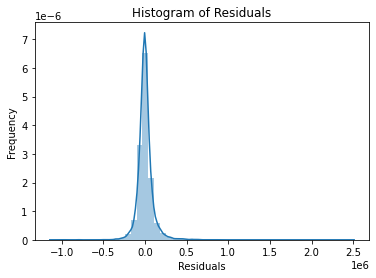

In [800]:
#check for normality in errors
sns.distplot(y_train-y_pred)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

###### Model Evaluation

In [801]:
#Use test data with the model
y_test_pred = xgboost.predict(X_test)

In [802]:
#Model Evaluation
r2_xgb = m.r2_score(y_test,y_test_pred)
mae_xgb =m.mean_absolute_error(y_test,y_test_pred)
print('R^2: ', m.r2_score(y_test,y_test_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_test,y_test_pred))
print('MSE: ', m.mean_squared_error(y_test,y_test_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_test,y_test_pred)))

R^2:  0.8993560310288841
Adjusted R^2:  0.8990758158020503
MAE:  68100.39168530228
MSE:  13667412097.91146
RMSE:  116907.70760694721


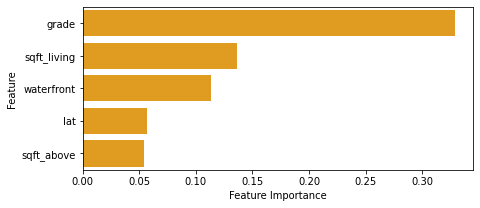

In [803]:
xgb_feature_importances = xgboost.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, index=X_train.columns.values).sort_values(ascending=False).head(5)
fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(x=xgb_feature_importances,
y=xgb_feature_importances.index,
color="orange")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [804]:
#feature importance
for i in zip( xgboost.feature_importances_,X_train ):
    print(sorted([i], key = lambda x:x[1]))

[(0.008420613, 'bedrooms')]
[(0.047293674, 'bathrooms')]
[(0.13642223, 'sqft_living')]
[(0.010694561, 'sqft_lot')]
[(0.008434626, 'floors')]
[(0.11385903, 'waterfront')]
[(0.04861876, 'view')]
[(0.012897281, 'condition')]
[(0.32865807, 'grade')]
[(0.054205824, 'sqft_above')]
[(0.023674361, 'sqft_basement')]
[(0.025761789, 'yr_built')]
[(0.017262, 'yr_renovated')]
[(0.018469546, 'zipcode')]
[(0.056599762, 'lat')]
[(0.028768158, 'long')]
[(0.047292832, 'sqft_living15')]
[(0.012666864, 'sqft_lot15')]


## K-Nearest Neighbor

In [805]:
from sklearn.neighbors import KNeighborsRegressor

In [806]:
#from sklearn.model_selection import RandomizedSearchCV

In [807]:
#parameter_space = {
   # "n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    #"weights": ["uniform", "distance"],
    #"algorithm": ["ball_tree", "kd_tree", "brute"],
    #"leaf_size": [30],
    #"metric": ["minkowski"]
#}

In [808]:
#knn = GridSearchCV(KNeighborsRegressor(), param_grid = parameter_space, cv=10, scoring="neg_mean_absolute_error", n_jobs=1)

In [809]:
knn = KNeighborsRegressor(n_neighbors=10)

In [810]:
#
# for i in range(4,25):
#     knn = KNeighborsRegressor(n_neighbors=i)
#     knn.fit(X_train, y_trai
#     knn.score(X_train, y_train)
#     y_pred = knn.predict(X_train)
#     print('R^2: ', m.r2_score(y_train, y_pred) )
#     print('Adjusted R^2: ', 1-(1-m.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
    

In [811]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [812]:
knn.score(X_test, y_test)

0.5201751495935494

In [813]:
#clf = clf.fit(X_train, y_train)
y_pred = knn.predict(X_train)
#m.accuracy_score(y_pred, y_test)

In [814]:
print('R^2: ', m.r2_score(y_train, y_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_train, y_pred))
print('MSE: ', m.mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_train, y_pred)))

R^2:  0.6068609864440644
Adjusted R^2:  0.606392654065242
MAE:  138301.23946063852
MSE:  52812241003.93833
RMSE:  229809.14038379397


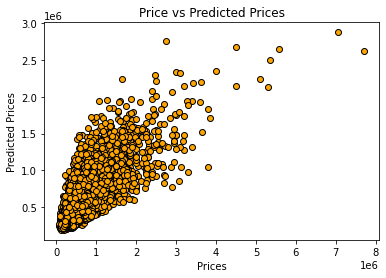

In [815]:
#Difference between actual price and predicted prices
plt.scatter(y_train, y_pred, color="orange", edgecolors="#000000")
plt.title('Price vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.show()

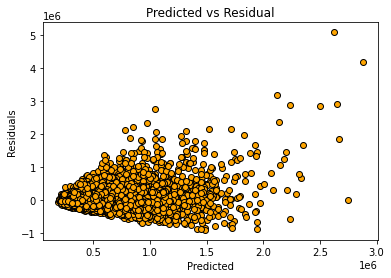

In [816]:
#check the residuals
plt.scatter(y_pred, y_train-y_pred, color="orange", edgecolors="#000000")
plt.title('Predicted vs Residual')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

C:\Users\noree\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


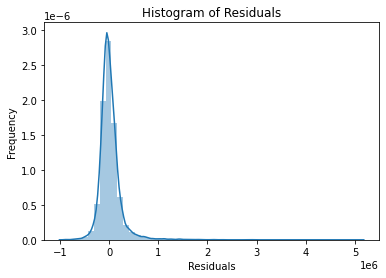

In [817]:
#check for normality in errors
sns.distplot(y_train-y_pred)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

###### Model Evaluation

In [818]:
#Use test data with the model
y_test_pred = knn.predict(X_test)

In [819]:
#Model Evaluation
r2_knn = m.r2_score(y_test,y_test_pred)
mae_knn =m.mean_absolute_error(y_test,y_test_pred)
print('R^2: ', m.r2_score(y_test,y_test_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_test,y_test_pred))
print('MSE: ', m.mean_squared_error(y_test,y_test_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_test,y_test_pred)))

R^2:  0.5201751495935494
Adjusted R^2:  0.5188392103348771
MAE:  155583.32168414557
MSE:  65160029283.08371
RMSE:  255264.6259924859


In [820]:
#for i in zip(knn.feature_importances_,X_train):
    #print(i)

In [821]:
#(pd.Series(knn.feature_importances_, index=X_train.columns)
   #.nlargest(10)
   #.plot(kind='bar'))

### DATA TRANSFORMATION

In [822]:
print (inputs.sqft_above.skew())
print(inputs.sqft_lot.skew())
print(inputs.sqft_lot15.skew())
print(inputs.sqft_living15.skew())
print(inputs.sqft_basement.skew())
print(target.skew())

1.4466644733818372
13.060018959031755
9.506743246764398
1.1081812758966967
1.5779650555996247
4.024069144684712


In [823]:
log_vars = ["log_sqft_lot", 
            "log_sqft_living15"]

In [824]:
# log-transforming chosen variables
inputs[log_vars] = np.log(inputs[["sqft_lot",
                          "sqft_living15"]])

In [825]:
# dropping un-transformed variables
inputs.drop([ "sqft_lot", "sqft_living15",  
          "sqft_living"], axis = 1, inplace = True)

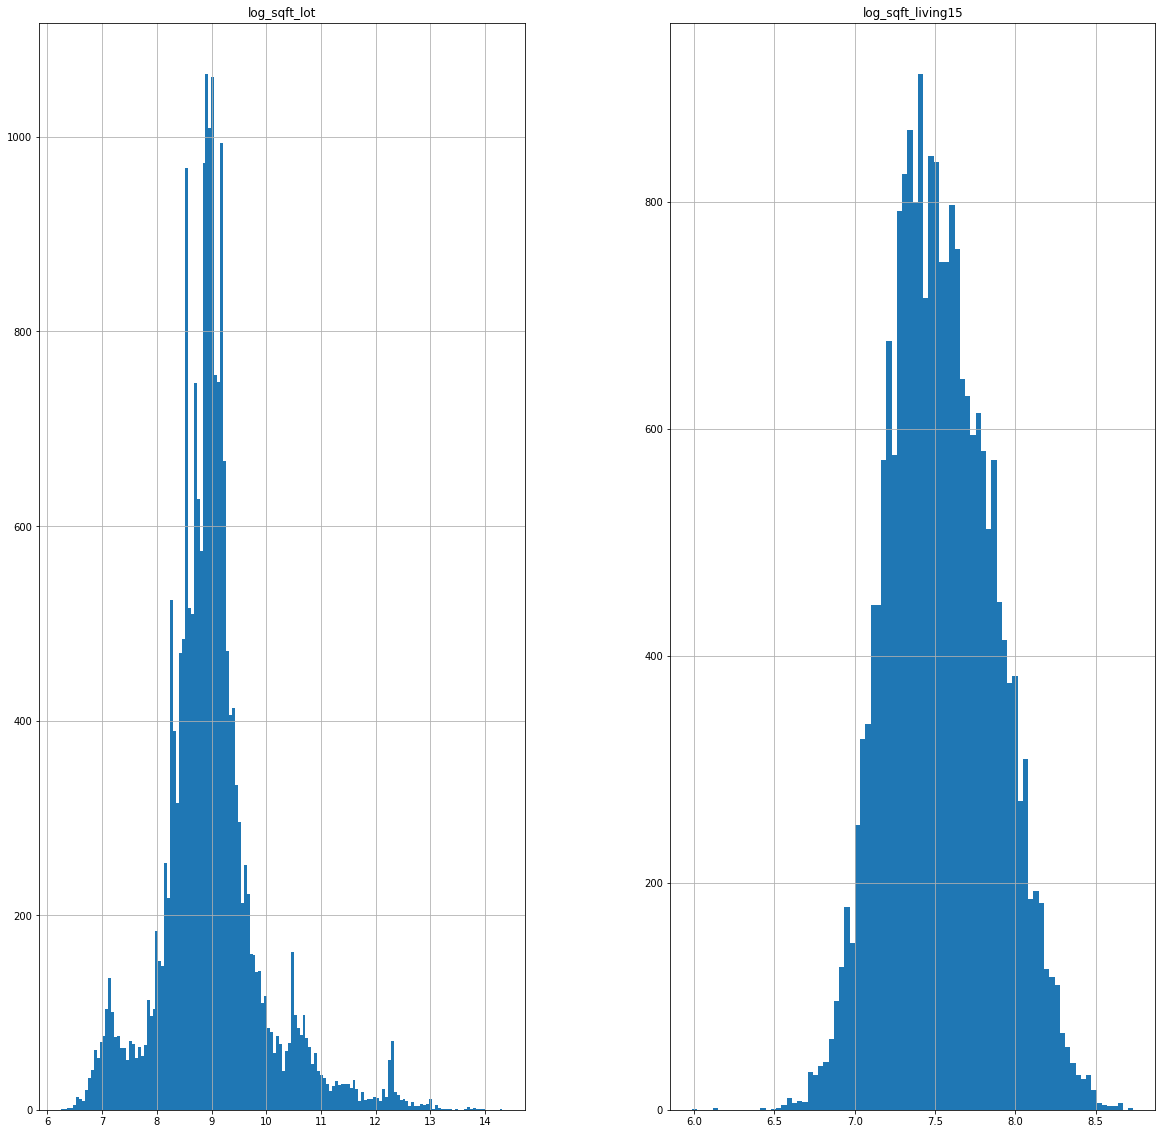

In [826]:
#visualize
inputs[log_vars].hist(bins = "auto", figsize = (20,20));

In [827]:
inputs.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'log_sqft_lot',
       'log_sqft_living15'],
      dtype='object')

In [828]:
#target.columns

In [829]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=123)

### LINEAR REGRESSION

In [830]:
inputs.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'log_sqft_lot',
       'log_sqft_living15'],
      dtype='object')

In [831]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [832]:
#create a Linear Regressor
lm = LinearRegression()

###### Model Training

In [833]:
lm.fit(X_train, y_train)

LinearRegression()

###### Model Testing

In [834]:
#predict y
y_pred = lm.predict(X_train)

###### Model Evaluation

In [835]:
print('R^2: ', m.r2_score(y_train, y_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_train, y_pred))
print('MSE: ', m.mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_train, y_pred)))

R^2:  0.6963849765370556
Adjusted R^2:  0.6960434071241199
MAE:  125617.33771182605
MSE:  40786055920.80222
RMSE:  201955.57907817804


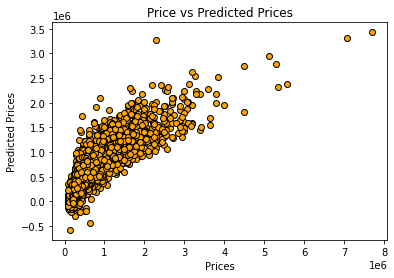

In [836]:
#Difference between actual price and predicted prices
plt.scatter(y_train, y_pred, color="orange", edgecolors="#000000")
plt.title('Price vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.show()

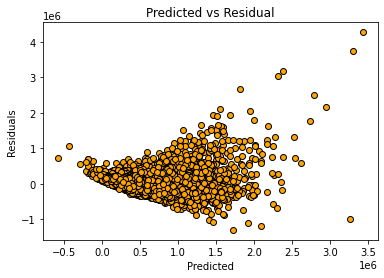

In [837]:
#check the residuals
plt.scatter(y_pred, y_train-y_pred, color="orange", edgecolors="#000000")
plt.title('Predicted vs Residual')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

C:\Users\noree\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


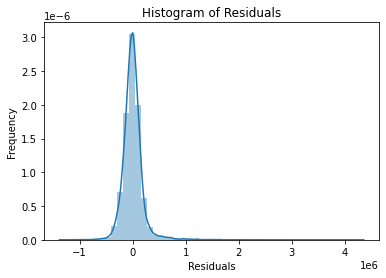

In [838]:
#check for normality in errors
sns.distplot(y_train-y_pred)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

###### Model Evaluation

In [839]:
#Use test data with the model
y_test_pred = lm.predict(X_test)

In [840]:
#Model Evaluation
r2_linear = m.r2_score(y_test,y_test_pred)
mae_linear =m.mean_absolute_error(y_test,y_test_pred)
print('R^2: ', m.r2_score(y_test,y_test_pred) )
print('Adjusted R^2: ', 1-(1-m.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE: ', m.mean_absolute_error(y_test,y_test_pred))
print('MSE: ', m.mean_squared_error(y_test,y_test_pred))
print('RMSE: ', np.sqrt(m.mean_squared_error(y_test,y_test_pred)))

R^2:  0.7116014759686246
Adjusted R^2:  0.7108432367313011
MAE:  126090.30821597051
MSE:  39164408127.59936
RMSE:  197899.99526932626


<AxesSubplot:>

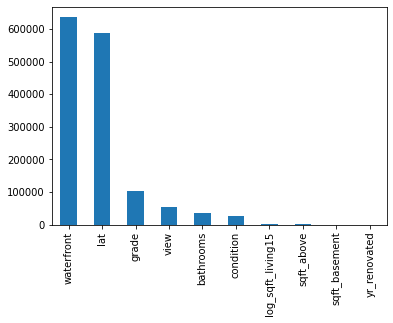

In [841]:
(pd.Series(lm.coef_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='bar'))

In [842]:
#feature importance
for i in zip( lm.coef_,X_train ):
    print(sorted([i], key = lambda x:x[1]))

[(-32841.41152707847, 'bedrooms')]
[(36219.236181075335, 'bathrooms')]
[(-19071.90193261045, 'floors')]
[(635998.5940150915, 'waterfront')]
[(54409.16368895691, 'view')]
[(25129.01831341536, 'condition')]
[(104411.40027513617, 'grade')]
[(200.74849594222732, 'sqft_above')]
[(152.8412537578947, 'sqft_basement')]
[(-2749.592537065154, 'yr_built')]
[(18.663243188027245, 'yr_renovated')]
[(-615.3546866951825, 'zipcode')]
[(589790.5617048342, 'lat')]
[(-172106.74730327513, 'long')]
[(0.22310060057190925, 'sqft_lot15')]
[(-29183.665522122752, 'log_sqft_lot')]
[(933.4021388924978, 'log_sqft_living15')]


### MODEL COMPARISON

In [861]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN'],
    'R-squared Score': [r2_linear*100, r2_decision*100, r2_random*100,r2_xgb*100, r2_knn*100],
    'MAE': [mae_linear, mae_decision, mae_random, mae_xgb, mae_knn]
})
models.sort_values(by = 'R-squared Score', ascending = False)

,Model,R-squared Score,MAE
3,XGBoost,89.935603,68100.391685
2,Random Forest,87.871534,69891.349265
1,Decision Tree,77.661285,96878.459330
0,Linear Regression,71.160148,126090.308216
4,KNN,52.017515,155583.321684


(array([0, 1, 2]),
 [Text(0, 0, 'grade'), Text(1, 0, 'sqft_living'), Text(2, 0, 'lat')])

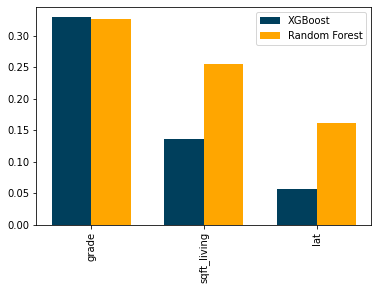

In [844]:
common_imp_feat = [x for x in xgb_feature_importances.index
if x in random_feature_importances.index]

commImpFeat_xgb_scores = [xgb_feature_importances[x]
for x in common_imp_feat]

commImpFeat_rf_scores = [random_feature_importances[x]
for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb_scores))
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb_scores, width,
color='#003f5c', label='XGBoost');
ax.bar(ind + width/2, commImpFeat_rf_scores, width,
color='#ffa600', label='Random Forest')
ax.set_xticks(ind)
ax.set_xticklabels(common_imp_feat)
ax.legend()
plt.xticks(rotation=90)

In [845]:
X_train.describe()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,log_sqft_lot,log_sqft_living15
count,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000
mean,3.370018,2.114069,1.495241,0.006940,0.230947,3.404653,7.649547,1787.930795,289.508494,1971.023068,85.753784,98078.213629,47.560705,-122.213398,12732.290634,8.988412,7.538776
std,0.936179,0.770427,0.538764,0.083022,0.762914,0.648938,1.165959,827.151338,441.008112,29.404403,404.756818,53.549964,0.138092,0.142077,27690.256719,0.902300,0.327866
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,651.000000,6.253829,5.988961
25%,3.000000,1.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471300,-122.328000,5100.000000,8.525161,7.306531
50%,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572600,-122.231000,7599.000000,8.932609,7.517521
75%,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98118.000000,47.678300,-122.125000,10078.000000,9.278279,7.766417
max,33.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,871200.000000,14.317109,8.733916


In [846]:
X_test.describe()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,log_sqft_lot,log_sqft_living15
count,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000
mean,3.372764,2.116363,1.492134,0.008945,0.242134,3.420574,7.673967,1789.463757,296.176897,1970.963294,81.248766,98077.300895,47.558530,-122.215059,12852.838834,8.993559,7.540990
std,0.915699,0.769605,0.542871,0.094162,0.774203,0.654850,1.197249,830.342185,446.209026,29.303192,394.417899,53.398692,0.139656,0.137875,26383.294427,0.902776,0.326713
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,420.000000,0.000000,1900.000000,0.000000,98001.000000,47.177600,-122.515000,748.000000,6.396930,6.429719
25%,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.470100,-122.329000,5100.000000,8.530849,7.306531
50%,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.500000,0.000000,98065.000000,47.570450,-122.229000,7680.000000,8.946375,7.517521
75%,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,580.000000,1997.000000,0.000000,98117.000000,47.677200,-122.125000,10116.000000,9.273315,7.766417
max,10.000000,7.750000,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777200,-121.676000,560617.000000,13.968055,8.663888


In [847]:
y_train.describe()


count    1.512900e+04
mean     5.391837e+05
std      3.665292e+05
min      7.800000e+04
25%      3.230000e+05
50%      4.500000e+05
75%      6.410000e+05
max      7.700000e+06
Name: price, dtype: float64

In [848]:
y_test.describe()

count    6.484000e+03
mean     5.421985e+05
std      3.685384e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.500000e+05
max      6.885000e+06
Name: price, dtype: float64

#### The End!